<div style="background-color: rgb(230, 216, 173); padding: 10px; height: 70px; border-radius: 15px;">
    <div style="font-family: 'Georgia', serif; font-size: 20px; padding: 10px; text-align: right; position: absolute; right: 20px; color: #0a0a0a;">
        <span style="color: Black;">Neel Adalja</span> <br>
        <span style="font-family: 'Arial', sans-serif; font-size: 12px; color: #0a0a0a;">Data Scientist | Data Analyst</span>
    </div>
</div>

<div style="background-color:hsl(184, 33.00%, 56.10%); padding: 10px; text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif;">
    Hosuing Price Prediction Project <br>
    <h3 style="text-align: center; color: white; font-size: 15px; font-family: 'Arial', sans-serif;">Python | Pandas | Numpy | Scikit-learn | Machine Learning</h3>
</div>

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display

In [3]:
#loading the dataset from the source
df1 = pd.read_csv("./AmesHousing.csv")

In [4]:
#this is out dataframe. it has 82 columns 2930 rows. 
df1

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [5]:
#setting colum disply to display everything in the dataframe. 
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None) #shows all rows
#df1

In [17]:
#display infor bout the columns and dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
#keeping only necessary features. 
required_columns = ['Lot Area','Neighborhood','Bldg Type','House Style','Year Built','Year Remod/Add','Roof Style',
                    'Heating','Electrical','Full Bath','Bedroom AbvGr','Garage Cars','SalePrice']
df2 = df1[required_columns]

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Neighborhood    2930 non-null   object 
 2   Bldg Type       2930 non-null   object 
 3   House Style     2930 non-null   object 
 4   Year Built      2930 non-null   int64  
 5   Year Remod/Add  2930 non-null   int64  
 6   Roof Style      2930 non-null   object 
 7   Heating         2930 non-null   object 
 8   Electrical      2929 non-null   object 
 9   Full Bath       2930 non-null   int64  
 10  Bedroom AbvGr   2930 non-null   int64  
 11  Garage Cars     2929 non-null   float64
 12  SalePrice       2930 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 297.7+ KB


In [9]:
df2.head(10) #new uopdated dataframe

,Lot Area,Neighborhood,Bldg Type,House Style,Year Built,Year Remod/Add,Roof Style,Heating,Electrical,Full Bath,Bedroom AbvGr,Garage Cars,SalePrice
0,31770,NAmes,1Fam,1Story,1960,1960,Hip,GasA,SBrkr,1,3,2.0,215000
1,11622,NAmes,1Fam,1Story,1961,1961,Gable,GasA,SBrkr,1,2,1.0,105000
2,14267,NAmes,1Fam,1Story,1958,1958,Hip,GasA,SBrkr,1,3,1.0,172000
3,11160,NAmes,1Fam,1Story,1968,1968,Hip,GasA,SBrkr,2,3,2.0,244000
4,13830,Gilbert,1Fam,2Story,1997,1998,Gable,GasA,SBrkr,2,3,2.0,189900
5,9978,Gilbert,1Fam,2Story,1998,1998,Gable,GasA,SBrkr,2,3,2.0,195500
6,4920,StoneBr,TwnhsE,1Story,2001,2001,Gable,GasA,SBrkr,2,2,2.0,213500
7,5005,StoneBr,TwnhsE,1Story,1992,1992,Gable,GasA,SBrkr,2,2,2.0,191500
8,5389,StoneBr,TwnhsE,1Story,1995,1996,Gable,GasA,SBrkr,2,2,2.0,236500
9,7500,Gilbert,1Fam,2Story,1999,1999,Gable,GasA,SBrkr,2,3,2.0,189000


In [10]:
df2.isnull().sum() # checking for null values

Lot Area          0
Neighborhood      0
Bldg Type         0
House Style       0
Year Built        0
Year Remod/Add    0
Roof Style        0
Heating           0
Electrical        1
Full Bath         0
Bedroom AbvGr     0
Garage Cars       1
SalePrice         0
dtype: int64

In [11]:
df3 = df2.dropna() # dropping 1 value which is null. 
df3.isnull().sum()

Lot Area          0
Neighborhood      0
Bldg Type         0
House Style       0
Year Built        0
Year Remod/Add    0
Roof Style        0
Heating           0
Electrical        0
Full Bath         0
Bedroom AbvGr     0
Garage Cars       0
SalePrice         0
dtype: int64

In [12]:
df3.shape #shape of the new dataframe

(2928, 13)

In [13]:
df3['House Style'].unique() #looking ofr unique values in the colum

array(['1Story', '2Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '1.5Unf',
       '2.5Fin'], dtype=object)

In [14]:
#counting how many values are there for each catrgory. 
value_counts = df3['House Style'].value_counts()
print(value_counts)

1Story    1481
2Story     872
1.5Fin     314
SLvl       127
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64


In [15]:
# Copying the dataframe for further cleaning
df4 = df3.copy()

# converting the floors to 1 story or 2 story. becuase 0.5 is the atic data and weather it is finished or not.
# we are not considering atics fot this data. the SLv1 is split level, so we consie it as 2 story
# SFoyer is also 2 level because in these types of houses, the levels are seprated by few stairs
#2.5Fin is 3 story because the house is finished on Atic level and furnished. 
df4['House Style'] = df4['House Style'].replace('2.5Fin', '3')
df4['House Style'] = df4['House Style'].replace('2.5Unf', '2Story')
df4['House Style'] = df4['House Style'].replace('1.5Unf', '1Story')
df4['House Style'] = df4['House Style'].replace('1.5Fin', '2Story')
df4['House Style'] = df4['House Style'].replace('SLvl', '2Story')
df4['House Style'] = df4['House Style'].replace('SFoyer', '2Story')
value_counts = df4['House Style'].value_counts()
print(value_counts)

1Story    1500
2Story    1420
3            8
Name: House Style, dtype: int64


In [16]:
# removed unncessary character from the columns
df4['House Style'] = df4['House Style'].replace('1Story', '1')
df4['House Style'] = df4['House Style'].replace('2Story', '2')
df4['House Style'].unique()

array(['1', '2', '3'], dtype=object)

In [17]:
df4['Lot Area'].unique() 

array([31770, 11622, 14267, ...,  7937,  8885, 10441], dtype=int64)

In [18]:
df4['Bedroom AbvGr'].unique()

array([3, 2, 1, 4, 6, 5, 0, 8], dtype=int64)

In [19]:
df4 = df4.drop(columns = ['Roof Style','Heating','Electrical','Garage Cars']) #removing unwanted columns

In [20]:
df4['Bldg Type'].unique()

array(['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon'], dtype=object)

In [22]:
df5 = df4.copy()
df5.head(10)

,Lot Area,Neighborhood,Bldg Type,House Style,Year Built,Year Remod/Add,Full Bath,Bedroom AbvGr,SalePrice
0,31770,NAmes,1Fam,1,1960,1960,1,3,215000
1,11622,NAmes,1Fam,1,1961,1961,1,2,105000
2,14267,NAmes,1Fam,1,1958,1958,1,3,172000
3,11160,NAmes,1Fam,1,1968,1968,2,3,244000
4,13830,Gilbert,1Fam,2,1997,1998,2,3,189900
5,9978,Gilbert,1Fam,2,1998,1998,2,3,195500
6,4920,StoneBr,TwnhsE,1,2001,2001,2,2,213500
7,5005,StoneBr,TwnhsE,1,1992,1992,2,2,191500
8,5389,StoneBr,TwnhsE,1,1995,1996,2,2,236500
9,7500,Gilbert,1Fam,2,1999,1999,2,3,189000


In [23]:
# converting the building column data to more broader category.
building_type = {
    '1Fam': 'Single-Family',
    'TwnhsE': 'Townhouse',
    'Twnhs': 'Townhouse',
    'Duplex': 'Multi-Family',
    '2fmCon': 'Multi-Family'
}

df5['Bldg Type'] = df5['Bldg Type'].replace(building_type)

# Count the updated values
value_counts = df5['Bldg Type'].value_counts()
print(value_counts)

Single-Family    2423
Townhouse         334
Multi-Family      171
Name: Bldg Type, dtype: int64


In [24]:
(df5['Neighborhood'].unique()) #total neighborhoods in our dataframe.

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [25]:
len((df5['Neighborhood'].unique()))

28

In [26]:
# finding anomlies by dividing the area with bedroom size. the average should be 600. 
# if less then,  those are anlomalies or it would affect while modeling. 
df5[df5['Lot Area']/df5['Bedroom AbvGr']<600].head(30)

,Lot Area,Neighborhood,Bldg Type,House Style,Year Built,Year Remod/Add,Full Bath,Bedroom AbvGr,SalePrice
30,1680,BrDale,Townhouse,2,1971,1971,1,3,105500
31,1680,BrDale,Townhouse,2,1971,1971,1,3,88000
329,1476,MeadowV,Townhouse,2,1970,1970,1,3,76000
404,1680,BrDale,Townhouse,2,1971,1971,2,3,112000
407,1680,BrDale,Townhouse,2,1972,1972,2,3,119500
978,1533,MeadowV,Townhouse,2,1970,2008,1,3,97000
1045,1680,BrDale,Townhouse,2,1972,1972,2,3,111750
1047,2308,NPkVill,Townhouse,2,1975,1975,2,4,143000
1599,1477,MeadowV,Townhouse,2,1970,2007,2,3,98000
1677,2058,BrDale,Townhouse,2,1973,1973,1,4,113700


In [27]:
df5.shape

(2928, 9)

In [28]:
#removed the anomlies. 
df6 = df5[~(df5['Lot Area']/df5['Bedroom AbvGr']<600)] 

In [29]:
df6.shape

(2910, 9)

In [30]:
df6['SalePrice'].describe()

count      2910.000000
mean     181307.988660
std       79896.141002
min       12789.000000
25%      129900.000000
50%      161000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

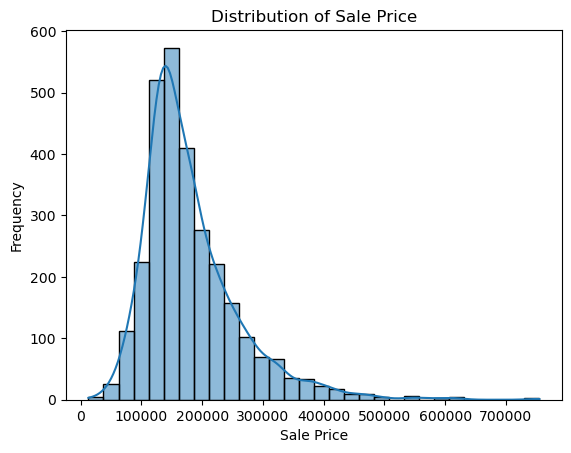

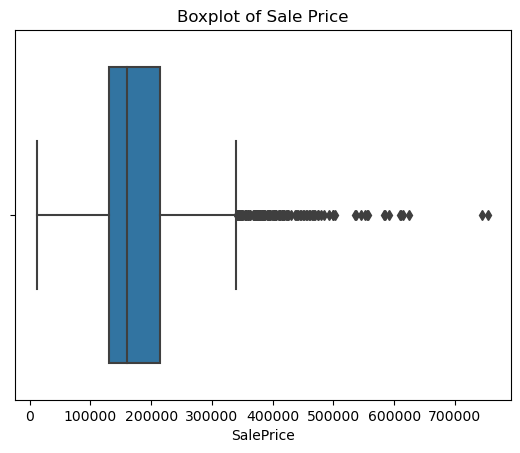

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram to inspect distribution
sns.histplot(df6['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot to detect outliers
sns.boxplot(x=df6['SalePrice'])
plt.title('Boxplot of Sale Price')
plt.show()


In [32]:
#setting minimum sale price. becuase we had outlier as low as 12000. which is not possible value. 
threshold = 80000

# Filter out rows where SalePrice is below the threshold
df7 = df6[df6['SalePrice'] >= threshold]

# Verify the updated DataFrame
print(df7['SalePrice'].describe())

count      2830.000000
mean     184653.091873
std       78427.713030
min       80000.000000
25%      132000.000000
50%      164000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64


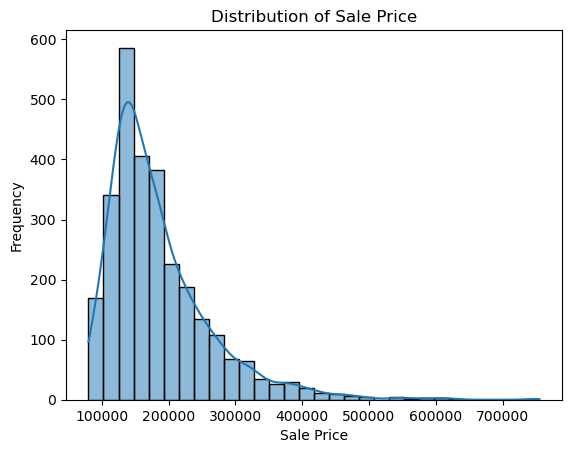

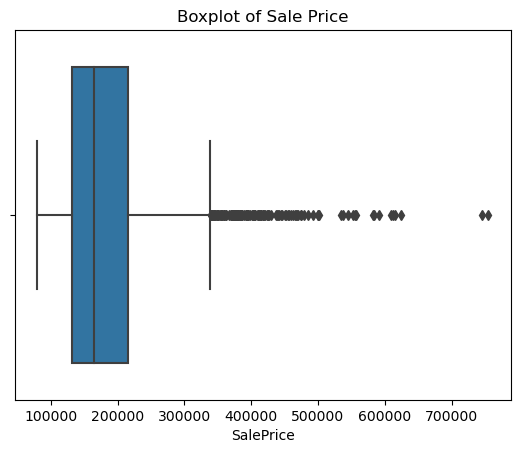

In [33]:
sns.histplot(df7['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot to detect outliers
sns.boxplot(x=df7['SalePrice'])
plt.title('Boxplot of Sale Price')
plt.show()

In [34]:
len(df7[df7['SalePrice']>350000]) #finding out how many outliers are there which are more than top whisker shows. 

119

In [35]:
df7[df7['SalePrice']>700000] # there are 2 extremely high values that might affect the model. 

,Lot Area,Neighborhood,Bldg Type,House Style,Year Built,Year Remod/Add,Full Bath,Bedroom AbvGr,SalePrice
1760,15623,NoRidge,Single-Family,2,1996,1996,3,4,745000
1767,21535,NoRidge,Single-Family,2,1994,1995,3,4,755000


In [36]:
df8=df7.copy()
df8.shape

(2830, 9)

In [37]:
df8['Full Bath'].unique() # there is a row where bathroom is 0 in a house. that also an outlier. 

array([1, 2, 3, 0, 4], dtype=int64)

In [39]:
df8[df8['Bedroom AbvGr']<1].head() #these are the values where the bathtroom is 0. 

,Lot Area,Neighborhood,Bldg Type,House Style,Year Built,Year Remod/Add,Full Bath,Bedroom AbvGr,SalePrice
158,6979,OldTown,Multi-Family,2,1980,1980,0,0,144000
232,23595,ClearCr,Single-Family,1,1979,1979,0,0,260000
999,4923,StoneBr,Townhouse,1,2001,2002,1,0,286000
1385,12900,Sawyer,Multi-Family,2,1969,1969,0,0,108959
2118,20064,ClearCr,Single-Family,1,1976,1976,0,0,279000


In [40]:
df8 = df8[df8['Bedroom AbvGr'] >= 1] #removed those rows where bedroom is 0. 

In [42]:
df8.shape

(2822, 9)

In [44]:
df8[df8['Full Bath']<1].head() #places where bathrooms are 0. 

,Lot Area,Neighborhood,Bldg Type,House Style,Year Built,Year Remod/Add,Full Bath,Bedroom AbvGr,SalePrice
808,7018,SawyerW,Multi-Family,2,1979,1979,0,2,153337
813,7040,SawyerW,Multi-Family,2,1979,1979,0,2,148325
1742,3922,Blmngtn,Townhouse,1,2006,2007,0,2,194201


In [45]:
df8 = df8[df8['Full Bath'] >= 1] #removed those rows wehre the bathroom are 0. 
df8.shape

(2819, 9)

In [46]:
import csv
df8.to_csv('housing_with_outliers.csv', index=False)
#saving file with outlier. 
#importhing to new csv fie so that it will be easy to work seprately with file having outlier and file without outlier. 

In [47]:
df9 = df8.copy()
df9.shape

(2819, 9)

In [48]:
outlier_rows = (df9[df9['SalePrice'] > 300500])
print(outlier_rows)
#df10 = df9.drop(outlier_rows.index)
#df10.shape

      Lot Area Neighborhood      Bldg Type House Style  Year Built  \
15       53504      StoneBr  Single-Family           2        2003   
17       11394      StoneBr  Single-Family           1        2010   
36       12858      NridgHt  Single-Family           2        2009   
37       11478      NridgHt  Single-Family           1        2007   
38       10159      NridgHt  Single-Family           1        2009   
44       12919      NridgHt  Single-Family           1        2009   
46       14300      NridgHt  Single-Family           1        2003   
47       13650      NridgHt  Single-Family           2        2002   
48        7658      NridgHt      Townhouse           1        2005   
59       14774      NoRidge  Single-Family           2        1999   
60       17433      NoRidge  Single-Family           2        1998   
62       12256      NoRidge  Single-Family           2        1994   
65       14720      NoRidge  Single-Family           2        1995   
91       13143      

In [49]:
df10 = df9.drop(outlier_rows.index)
df10.shape

(2590, 9)

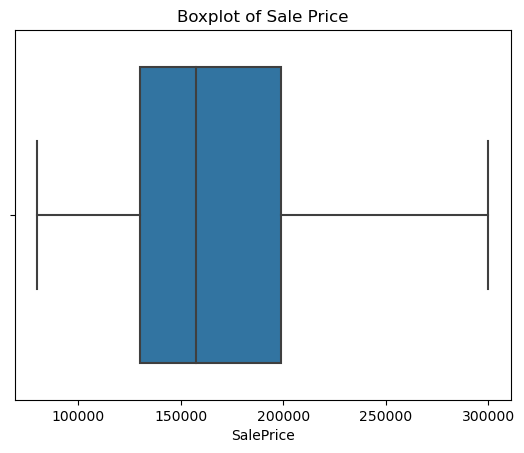

In [50]:
sns.boxplot(x=df10['SalePrice'])
plt.title('Boxplot of Sale Price')
plt.show()

In [51]:
df10.to_csv('housing_without_outliers.csv', index=False)
#this is saving file without outlier. 